In [1]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d as spline

import TwoPUtils as tpu

%matplotlib inline

In [2]:
rng = np.random.default_rng()



In [3]:
class KWTA():
    
    def __init__(self,n_pos = 30, w_max=100, n_ca3=1000, n_ca1 = 1000, n_winners = 100, eta=1E-4, tau=1E-5, eta_ctrl = None, max_pos = 10):
        
        self.n_pos = n_pos
        self.pos = np.linspace(0,10,num=n_pos)[np.newaxis,:]
        self.max_pos = max_pos
        self.w_max = w_max
        self.n_ca3 = n_ca3
        self.n_ca1 = 1000
        self.n_winners = n_winners
        self.eta = eta
        self.tau = tau
        
        
        self.mu = np.linspace(0,self.max_pos,num=n_ca3)[:,np.newaxis]
        self.ca3  = tpu.utilities.gaussian(self.mu,.5,self.pos) # cells by postions

        self.w = rng.lognormal(sigma=.5, size= [n_ca1,n_ca3])
        
        if eta_ctrl is not None:
            ctrl_x = np.linspace(0,10,num=eta_gain.shape[0])
            self.eta_gain = spline(ctrl_x,eta_ctrl)
            self.eta_gain_mat = np.eye(n_pos)*eta_gain(self.pos).T
        else:
            self.eta_gain_mat = np.eye(n_pos)
            
        
    
        
        
    def forward(self):
        ca1 = np.zeros([self.n_ca1,self.n_pos])
        activations = np.matmul(self.w,self.ca3)
        winners = np.argsort(activations,axis=0)[::-1,:]
        for pos_ind in range(self.n_pos):
            ca1[winners[:self.n_winners,pos_ind],pos_ind]=activations[winners[:self.n_winners,pos_ind],pos_ind]
        
        self.w += self.eta*np.matmul(np.matmul(ca1,self.eta_gain_mat),self.ca3.T) - self.tau
        self.w = np.minimum(np.maximum(self.w,0),self.w_max)
        return ca1

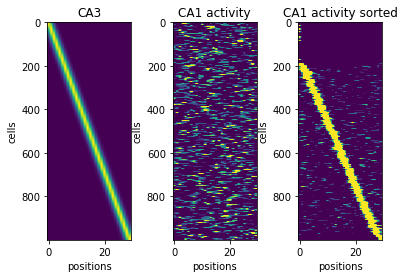

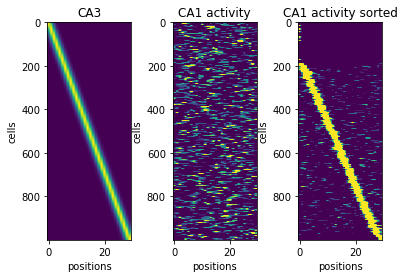

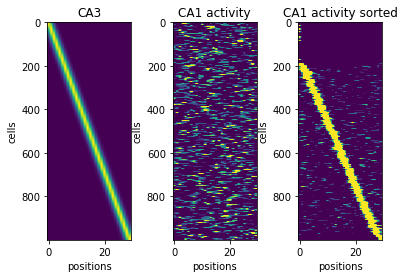

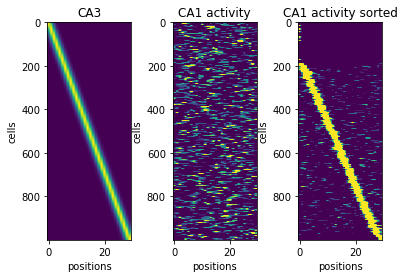

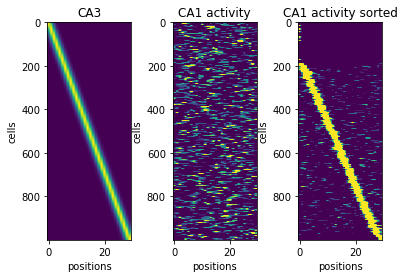

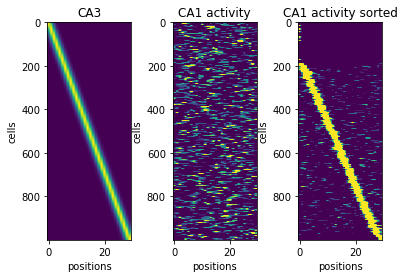

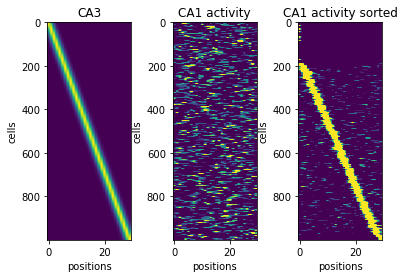

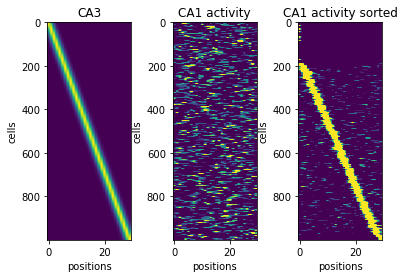

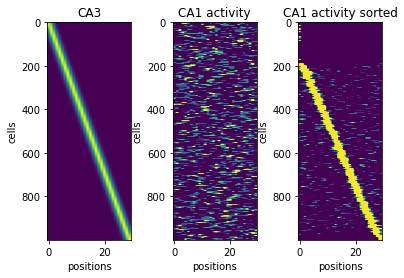

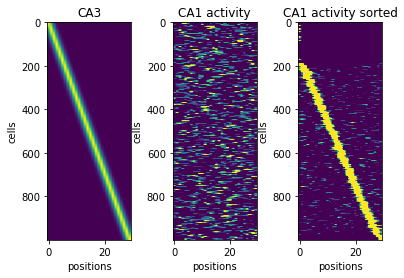

In [6]:
kwta = KWTA(eta = 0)
for trial in range(10):
    fig,ax = plt.subplots(1,3)
    fig.subplots_adjust(wspace= .5)
    ca1 = kwta.forward()
    ca1_z = (ca1-ca1.mean(axis=-1,keepdims=True))/(np.std(ca1,axis=-1,keepdims=True)+1E-3)
    ax[0].imshow(kwta.ca3, vmin=0,vmax=1, aspect='auto')
    ax[0].set_title('CA3')

    ax[1].imshow(ca1_z, vmin=0,vmax=1, aspect='auto')
    
    if trial == 0:
        ca1_sort = np.argsort(np.argmax(ca1,axis=-1))
    ax[2].imshow(ca1_z[ca1_sort,:], vmin=0,vmax=1,aspect='auto')

    ax[1].set_title('CA1 activity')
    ax[2].set_title('CA1 activity sorted')

    for i in range(3):
        ax[i].set_ylabel('cells')
        ax[i].set_xlabel('positions')


(1000, 1000)


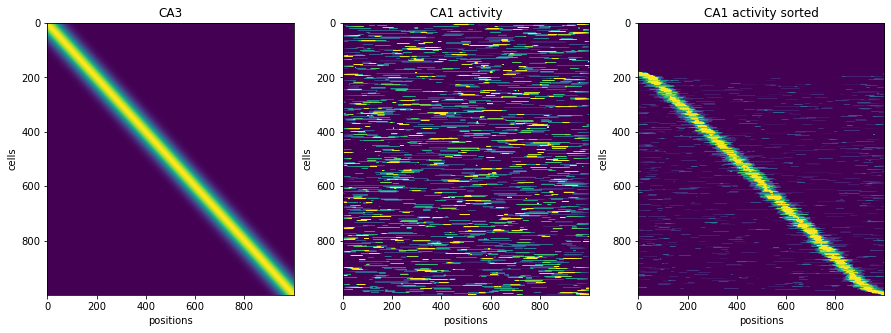

In [17]:
# repeat with radial basis funcitons
npos = 1000
pos = np.linspace(0,10,num=npos)[np.newaxis,:]


n_ca3=1000
n_ca1=1000
n_winners = 100

mu = np.linspace(0,10,num=n_ca3)[:,np.newaxis]
ca3  = tpu.utilities.gaussian(mu,.5,pos) # cells by postions

w = rng.lognormal(sigma=.5, size= [n_ca1,n_ca3])

activations = np.matmul(w,ca3) 
winners = np.argsort(activations,axis=0)[::-1,:]
print(winners.shape)

ca1 = np.zeros([n_ca1,npos])
for i in range(npos):
    ca1[winners[:n_winners,i],i]=activations[winners[:n_winners,i],i]
# print(ca3.sum(axis=-1))

ca1_z = (ca1-ca1.mean(axis=-1,keepdims=True))/(np.std(ca1,axis=-1,keepdims=True)+1E-3)
fig, ax = plt.subplots(1,3, figsize=[15, 5])
ax[0].imshow(ca3, vmin=0,vmax=1, aspect='auto')
ax[0].set_title('CA3')

ax[1].imshow(ca1_z, vmin=0,vmax=1, aspect='auto')

ca1_sort = np.argsort(np.argmax(ca1,axis=-1))
ax[2].imshow(ca1_z[ca1_sort,:], vmin=0,vmax=3,aspect='auto')

ax[1].set_title('CA1 activity')
ax[2].set_title('CA1 activity sorted')

for i in range(3):
    ax[i].set_ylabel('cells')
    ax[i].set_xlabel('positions')


In [ ]:
print(np.std(ca1,axis)

In [15]:


n_trials = 10
n_pos = 1000
pos = np.linspace(0,10,num=npos)[np.newaxis,:]
w_max = 100


n_ca3=1000
n_ca1=1000
n_winners = 100

eta = 1E-5
tau = 1E-5

mu = np.linspace(0,10,num=n_ca3)[:,np.newaxis]
ca3  = tpu.utilities.gaussian(mu,.5,pos) # cells by postions

w = rng.lognormal(sigma=.5, size= [n_ca1,n_ca3])
ca1 = np.zeros([n_trials,n_ca1,n_pos])
for trial in range(n_trials):
    activations = np.matmul(w,ca3)
    winners = np.argsort(activations,axis=0)[::-1,:]
    for pos in range(n_pos):
        ca1[trial, winners[:n_winners,pos],pos]=activations[winners[:n_winners,pos],pos]
    w += eta*np.matmul(ca1[trial,:,:],ca3.T) 
    w = np.minimum(np.maximum(w,0),w_max)
    
    
    

11.839133518578487 0.0720739900268202
11.839133518578487 0.0720739900268202
11.839133518578487 0.0720739900268202
11.839133518578487 0.0720739900268202
11.839133518578487 0.0720739900268202
11.839133518578487 0.0720739900268202
11.839133518578487 0.0720739900268202
11.839133518578487 0.0720739900268202
11.839133518578487 0.0720739900268202
11.839133518578487 0.0720739900268202


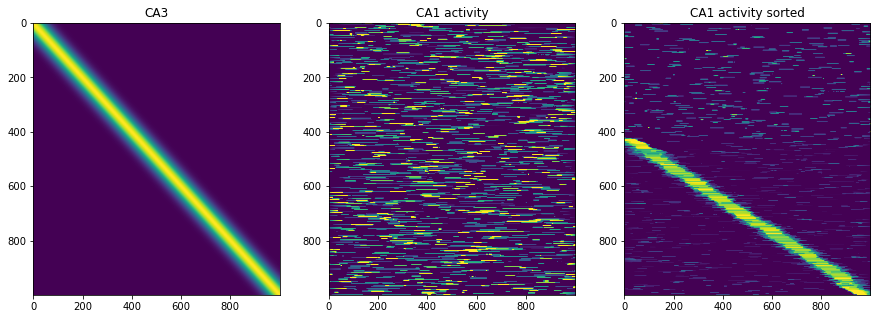

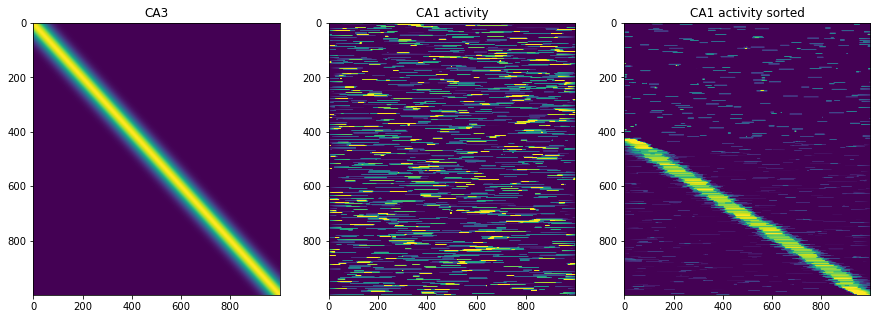

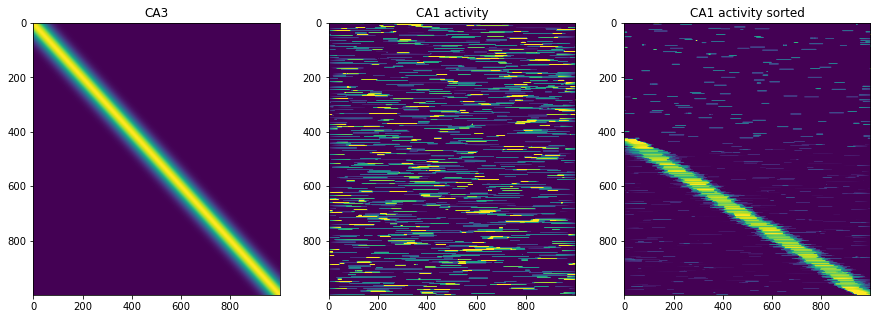

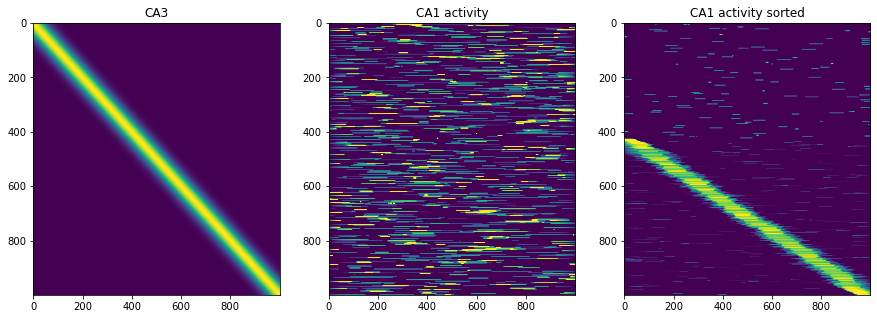

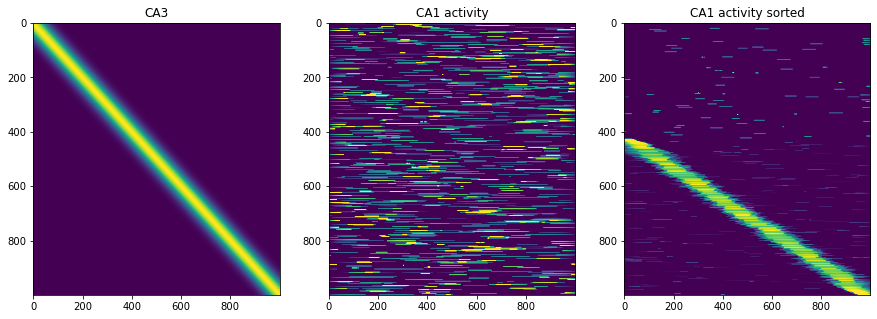

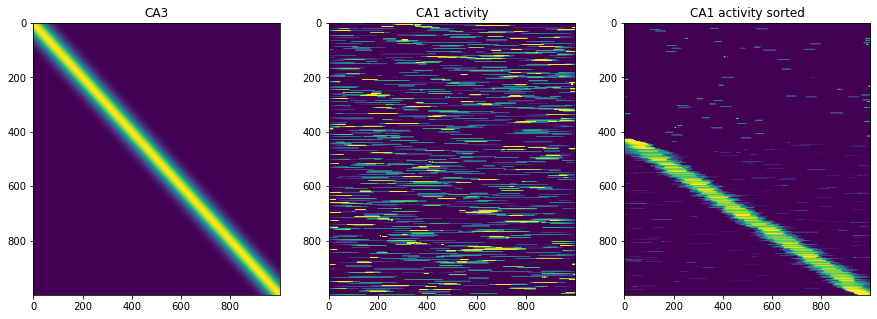

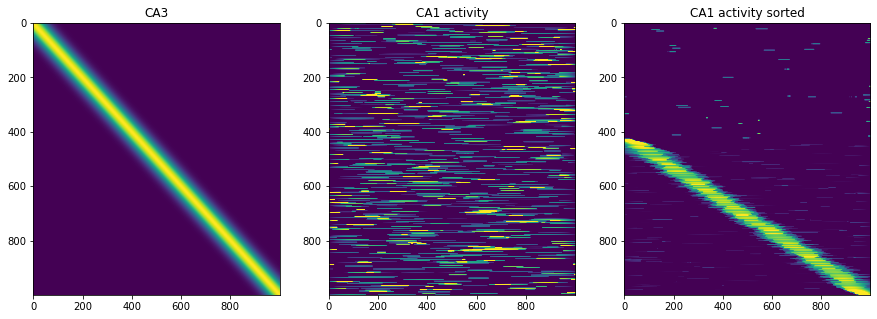

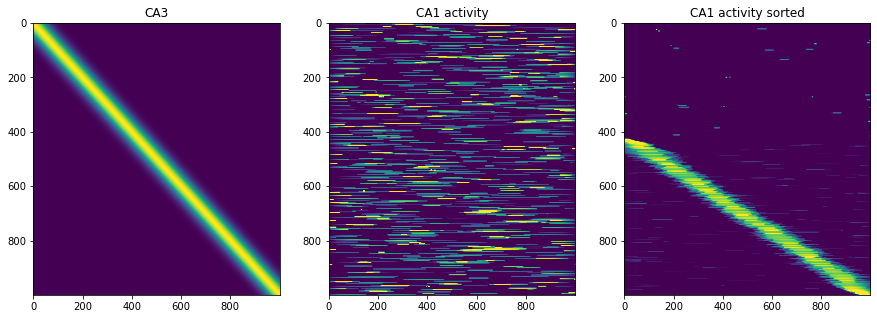

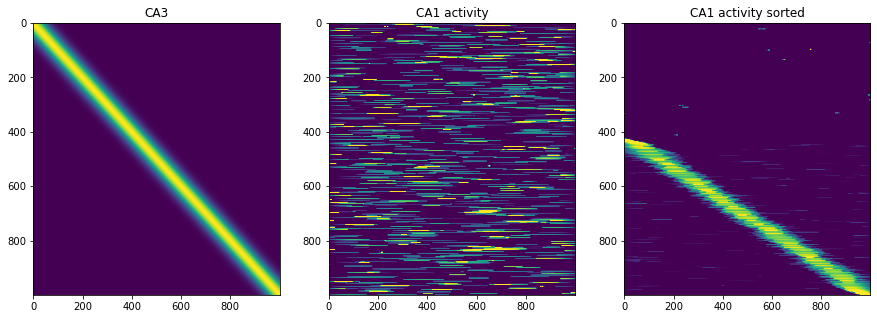

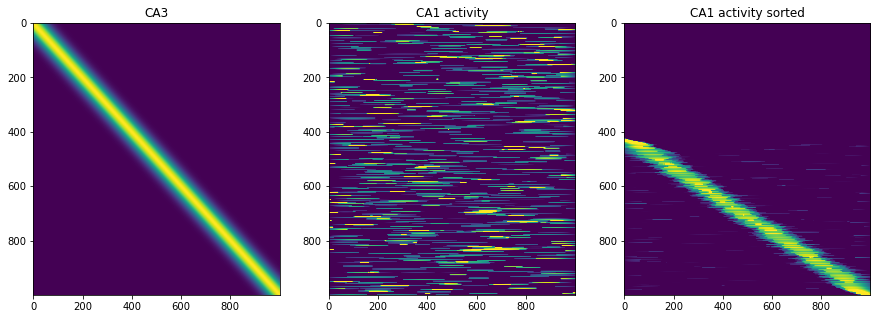

In [16]:
for trial in range(n_trials):
    ca1_z = (ca1-ca1.mean(axis=-1,keepdims=True))/(np.std(ca1,axis=-1,keepdims=True)+1E-3)
    fig, ax = plt.subplots(1,3, figsize=[15, 5])
    ax[0].imshow(ca3, vmin=0,vmax=1, aspect='auto')
    ax[0].set_title('CA3')

    ax[1].imshow(ca1_z[trial,:,:], vmin=0,vmax=1, aspect='auto')

    ca1_sort = np.argsort(np.argmax(ca1[-1,:,:],axis=-1))
    ax[2].imshow(ca1_z[trial, ca1_sort,:], vmin=0,vmax=3,aspect='auto')

    ax[1].set_title('CA1 activity')
    ax[2].set_title('CA1 activity sorted')

    print(np.amax(w),np.amin(w))

In [12]:
ctrl_x = np.linspace(0,10,num=10)
ctrl_y = np.array([.1, .1, .1, .1, .3, .5, .1, .1 ,.1,.1 ])

eta_gain = spline(ctrl_x,ctrl_y)


n_trials = 10
n_pos = 1000
pos = np.linspace(0,10,num=npos)[np.newaxis,:]
w_max = 100


n_ca3=1000
n_ca1=1000
n_winners = 100

eta = 1E-4
tau = 1E-5



mu = np.linspace(0,10,num=n_ca3)[:,np.newaxis]
ca3  = tpu.utilities.gaussian(mu,.5,pos) # cells by postions

w = rng.lognormal(sigma=.5, size= [n_ca1,n_ca3])
ca1 = np.zeros([n_trials,n_ca1,n_pos])
print(np.eye(n_pos).shape,eta_gain(pos).shape)
eta_gain_mat = np.eye(n_pos)*eta_gain(pos).T
print(eta_gain_mat.shape)
for trial in range(n_trials):
    activations = np.matmul(w,ca3)
    winners = np.argsort(activations,axis=0)[::-1,:]
    for pos_i in range(n_pos):
        ca1[trial, winners[:n_winners,pos_i],pos_i]=activations[winners[:n_winners,pos_i],pos_i]
    
    w += eta*np.matmul(np.matmul(ca1[trial,:,:],eta_gain_mat),ca3.T) - tau
    w = np.minimum(np.maximum(w,0),w_max)

(1000, 1000) (1, 1000)
(1000, 1000)


22.068903803920115 0.09064976556074317
22.068903803920115 0.09064976556074317
22.068903803920115 0.09064976556074317
22.068903803920115 0.09064976556074317
22.068903803920115 0.09064976556074317
22.068903803920115 0.09064976556074317
22.068903803920115 0.09064976556074317
22.068903803920115 0.09064976556074317
22.068903803920115 0.09064976556074317
22.068903803920115 0.09064976556074317


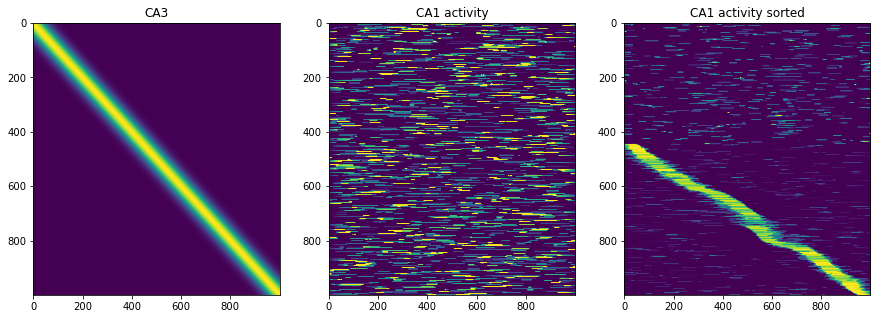

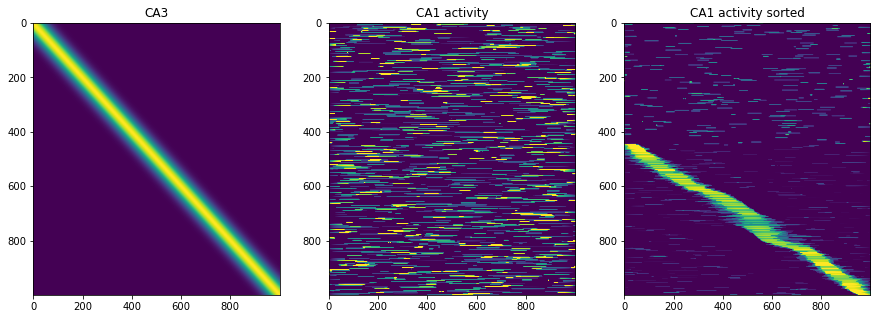

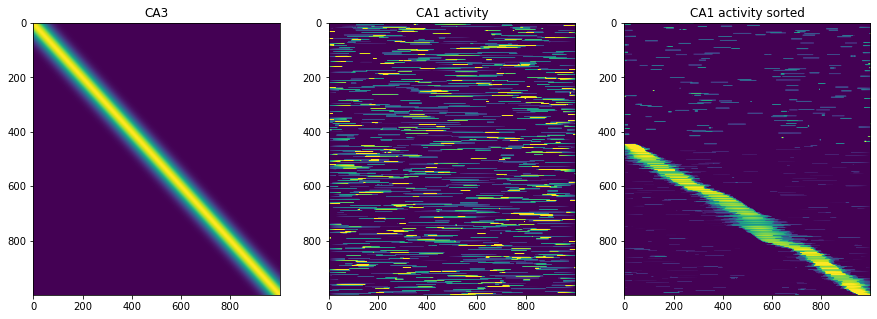

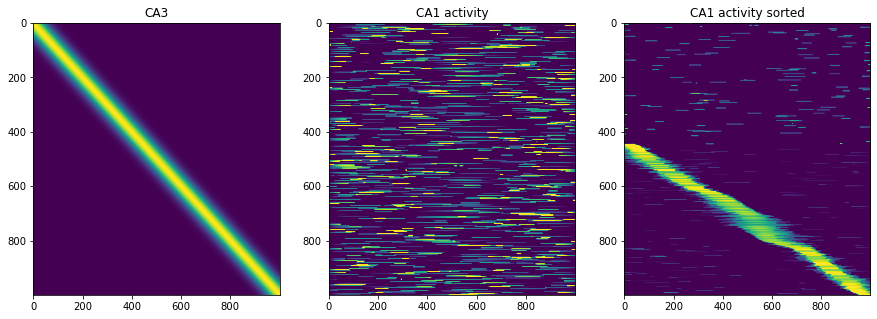

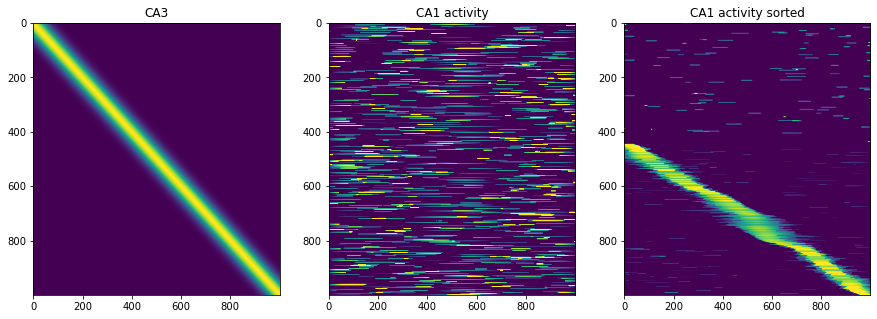

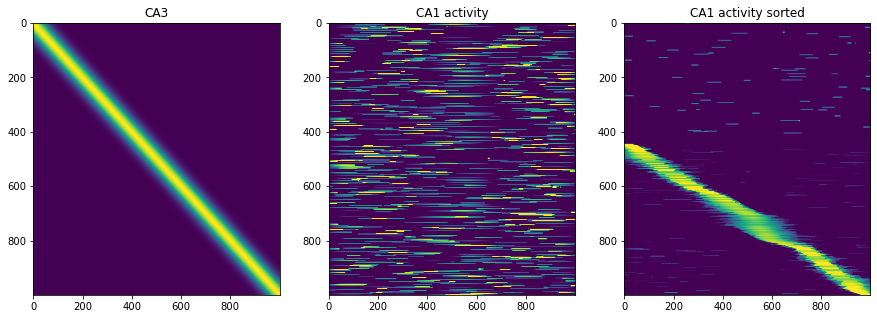

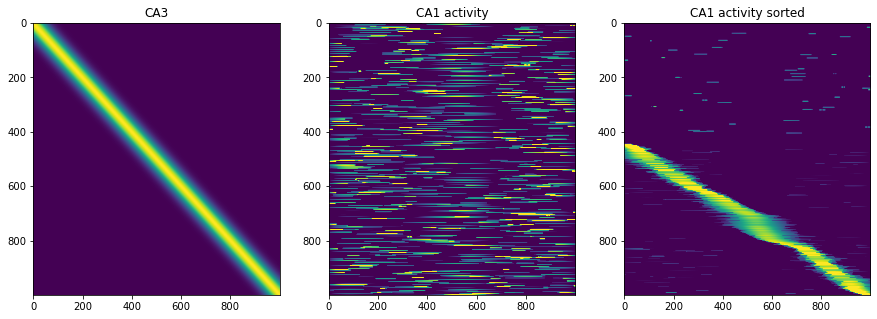

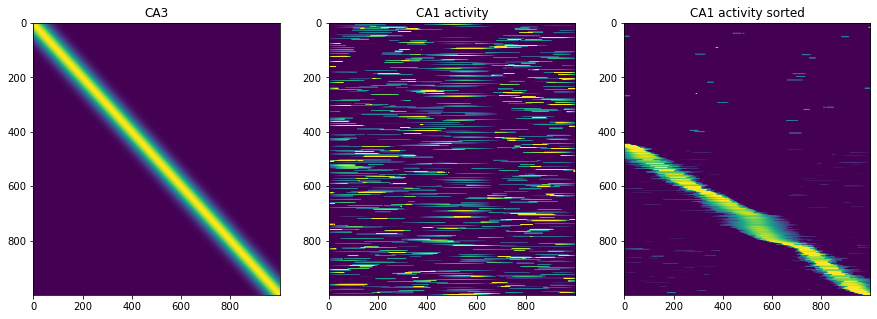

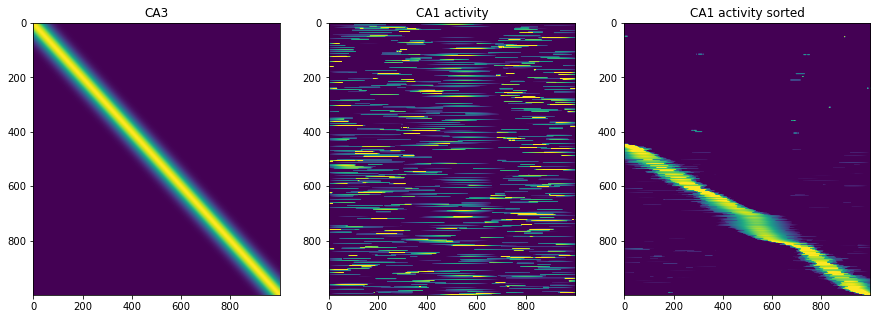

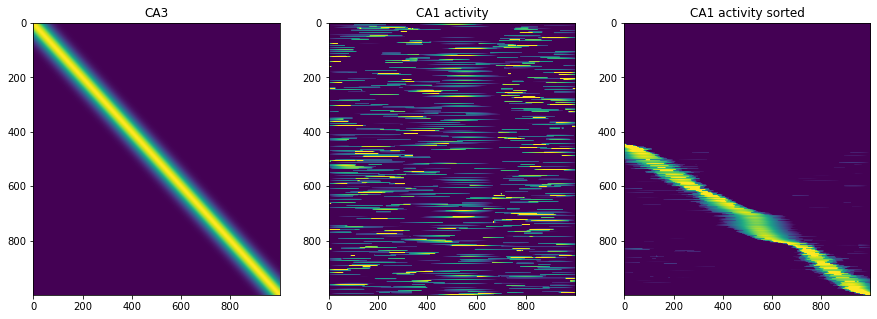

In [13]:
for trial in range(n_trials):
    ca1_z = (ca1-ca1.mean(axis=-1,keepdims=True))/(np.std(ca1,axis=-1,keepdims=True)+1E-3)
    fig, ax = plt.subplots(1,3, figsize=[15, 5])
    ax[0].imshow(ca3, vmin=0,vmax=1, aspect='auto')
    ax[0].set_title('CA3')

    ax[1].imshow(ca1_z[trial,:,:], vmin=0,vmax=1, aspect='auto')

    ca1_sort = np.argsort(np.argmax(ca1[-1,:,:],axis=-1))
    ax[2].imshow(ca1_z[trial, ca1_sort,:], vmin=0,vmax=3,aspect='auto')

    ax[1].set_title('CA1 activity')
    ax[2].set_title('CA1 activity sorted')

    print(np.amax(w),np.amin(w))

In [ ]:
# add learning with a gain parameter

# uniform gain parameter vs 0 gain

# gain parameter depends on proximity to reward - aka dopamine

# homeostatic plasticity

# look for prediction of more out of field firing in the absence of LTP

# ask for example entorhinal 

# prediction that CA3 inactivated animals won't over represent reward?


In [67]:
a= np.arange(0,10)
print(np.argsort(a))

[0 1 2 3 4 5 6 7 8 9]
